In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
from scipy.stats import norm, shapiro, anderson
import pylab
import pandas_profiling
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures,MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm
from sklearn.utils import shuffle

In [2]:
mathematics = pd.read_csv('./data/student_mat.csv')
portuegese = pd.read_csv('./data/student_por.csv')
mat = mathematics.copy()
por = portuegese.copy()

# <div align="center">Merging data (only unique students)</div>

In [3]:
merged = pd.merge(mat, por, how='inner', on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu",
                                         "Mjob","Fjob","reason","nursery","internet"])
merged.drop(['guardian_x', 'traveltime_x', 'studytime_x',
       'failures_x', 'schoolsup_x', 'famsup_x', 'paid_x', 'activities_x',
       'higher_x', 'romantic_x', 'famrel_x',
       'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x',
       'G1_x', 'G2_x', 'G3_x', 'guardian_y', 'traveltime_y', 'studytime_y',
       'failures_y', 'schoolsup_y', 'famsup_y', 'paid_y', 'activities_y',
       'higher_y', 'romantic_y', 'famrel_y', 'freetime_y', 'goout_y', 'Dalc_y',
       'Walc_y', 'health_y', 'absences_y', 'G1_y', 'G2_y', 'G3_y'], axis=1, inplace = True)
s = 0
for index, row in por.iterrows():
     if ((merged['school'] == row['school']) & (merged['sex'] == row['sex']) & (merged['age'] == row['age']) & 
         (merged['address'] == row['address']) & (merged['famsize'] == row['famsize']) & (merged['Pstatus'] == row['Pstatus']) &
         (merged['Medu'] == row['Medu']) & (merged['Fedu'] == row['Fedu']) & (merged['Mjob'] == row['Mjob']) &
        (merged['Fjob'] == row['Fjob']) & (merged['reason'] == row['reason']) & 
         (merged['nursery'] == row['nursery']) & (merged['internet'] == row['internet'])).any():
            por.drop(index, inplace=True)
mat_por = mat.append(por)

# <div align="center">Encoding binary data </div>

In [4]:
mat_por['schoolsup'] = mat_por['schoolsup'].replace({'yes':1, 'no':0})
mat_por['famsup'] = mat_por['famsup'].replace({'yes':1, 'no':0})
mat_por['paid'] = mat_por['paid'].replace({'yes':1, 'no':0})
mat_por['activities'] = mat_por['activities'].replace({'yes':1, 'no':0})
mat_por['nursery'] = mat_por['nursery'].replace({'yes':1, 'no':0})
mat_por['higher'] = mat_por['higher'].replace({'yes':1, 'no':0})
mat_por['internet'] = mat_por['internet'].replace({'yes':1, 'no':0})
mat_por['romantic'] = mat_por['romantic'].replace({'yes':1, 'no':0})

# <div align="center">Data Cleaning</div>

## 1. Missing data

In [5]:
mat_por = mat_por[mat_por["G3"] != 0]
mat_por

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
609     MS   F   18       U     GT3       T     1     2   at_home   at_home   
611     MS   F   18       R     GT3       T     2     2  services     other   
618     MS   F   18       R     LE3       A     1     2   at_home     other   
632     MS   F   19       R     GT3       T     1     1   at_home     other   
642     MS   F   17       U     GT3       T     4     3   teacher     other   

     ... famrel freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0    ...      4        3      4     1     1       3         6   5   6   6  
1    ...      5        3      3     1     1       3         4   5   5   6  
2    ...      4        3      2     2     3       3        10   7   8  10  
3    ...      3        2      2     1     1       5         2  15  14  15  
4    ...      4        3      2     1     2       5         4   6  10  10  
..   ...    ...      ...    ...   ...   ...     ...       ...  ..  ..  ..  
609  ...      4        1      1     1     1       4         0  11  11  12  
611  ...      4        2      1     1     1       4         5  14  14  15  
618  ...      4        3      4     1     4       5         0  16  15  15  
632  ...      4        3      3     1     1       3         4   7   8   9  
642  ...      5        5      4     1     1       1         0   6   9  11  

[622 rows x 33 columns]

### Data does not have missing values

In [6]:
for col in mat_por.columns:
    pct_missing = np.mean(mat[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 0.0%
famsize - 0.0%
Pstatus - 0.0%
Medu - 0.0%
Fedu - 0.0%
Mjob - 0.0%
Fjob - 0.0%
reason - 0.0%
guardian - 0.0%
traveltime - 0.0%
studytime - 0.0%
failures - 0.0%
schoolsup - 0.0%
famsup - 0.0%
paid - 0.0%
activities - 0.0%
nursery - 0.0%
higher - 0.0%
internet - 0.0%
romantic - 0.0%
famrel - 0.0%
freetime - 0.0%
goout - 0.0%
Dalc - 0.0%
Walc - 0.0%
health - 0.0%
absences - 0.0%
G1 - 0.0%
G2 - 0.0%
G3 - 0.0%


## 2. Irregular data (Outliers)

### No outliers in numerical data were found

In [7]:
df_numeric = mat_por.select_dtypes(include=[np.number])
for col in df_numeric.columns:
    print('\n' + col)
    print(df_numeric[col].describe())


age
count    622.000000
mean      16.776527
std        1.262577
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Medu
count    622.000000
mean       2.511254
std        1.137433
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

Fedu
count    622.000000
mean       2.305466
std        1.097473
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

traveltime
count    622.000000
mean       1.559486
std        0.743516
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

studytime
count    622.00000
mean       1.92926
std        0.82326
min        1.00000
25%        1.00000
50%        2.00000
75%        2.00000
max        4.00000
Name: studytime, dtype: float64

failures
count    622.

### No outliers in categorical data were found

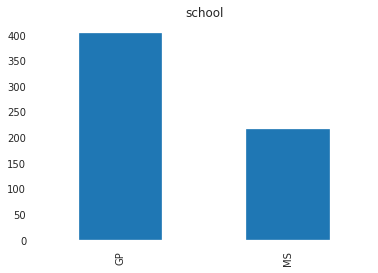

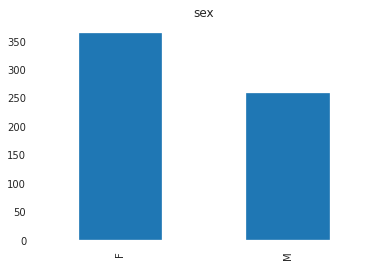

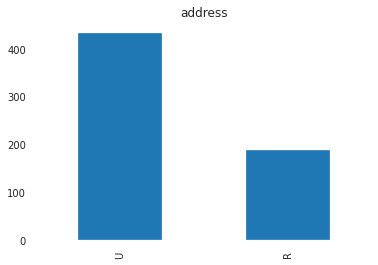

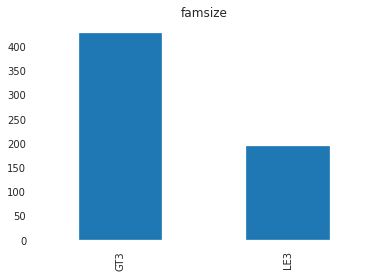

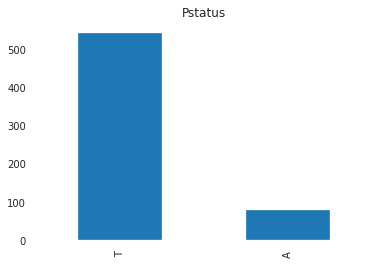

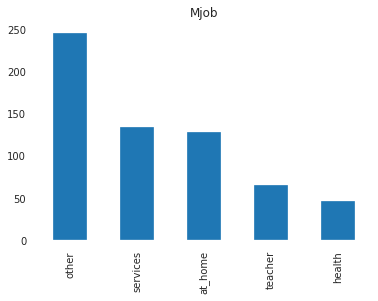

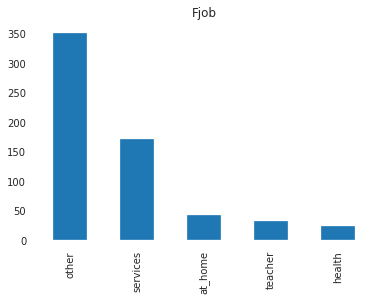

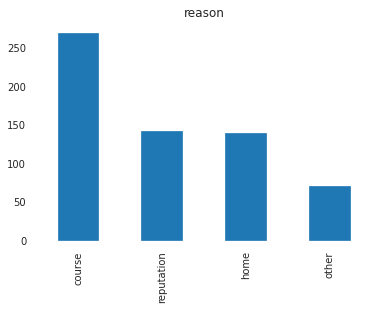

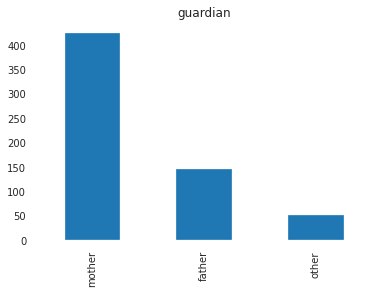

In [8]:
df_categorical = mat_por.select_dtypes(exclude=[np.number])
for col in df_categorical.columns:
    df_categorical[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

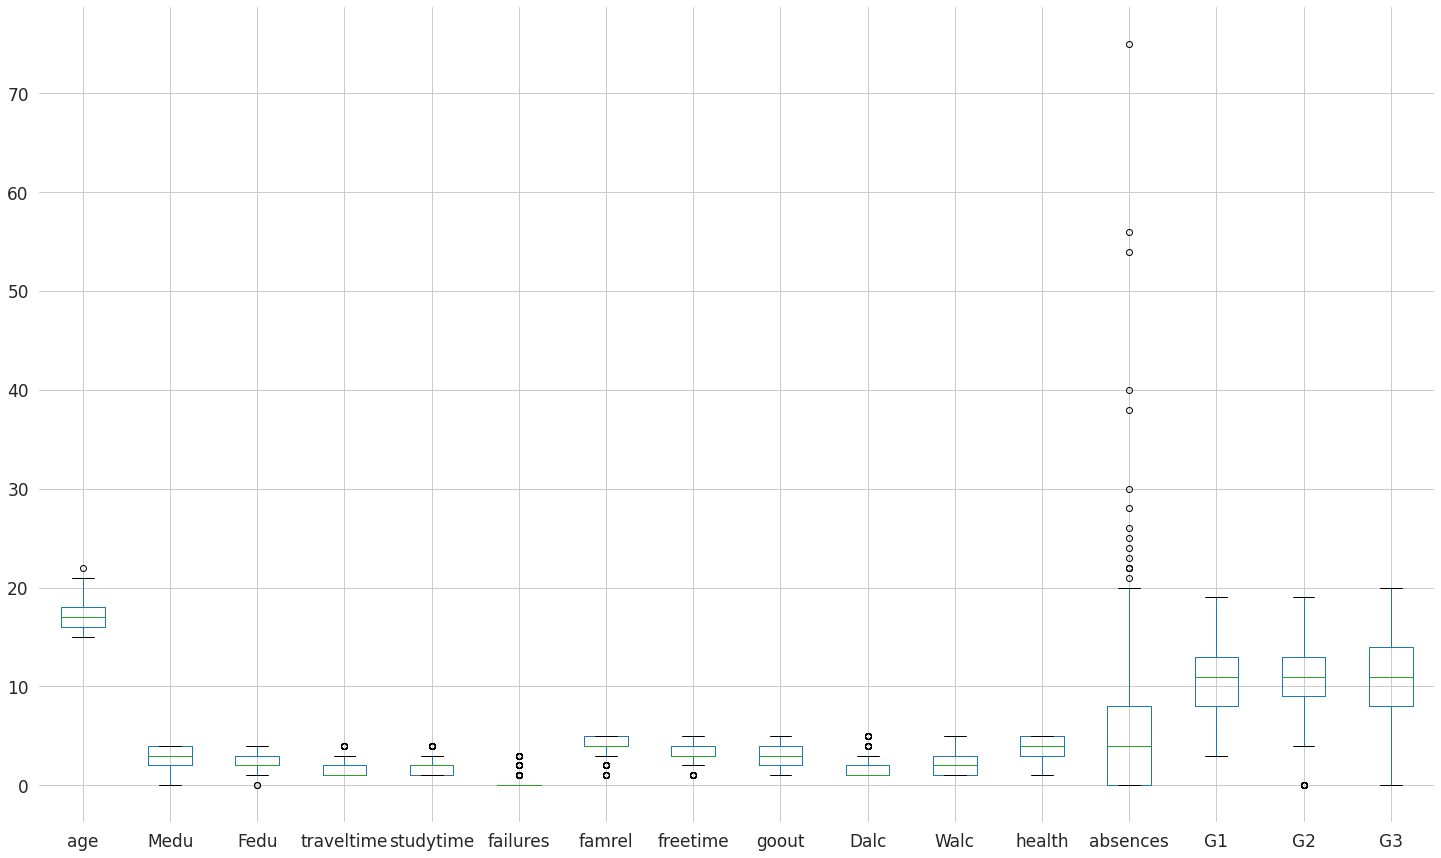

In [9]:
numerical = mat.select_dtypes(include=[np.number])
numerical.boxplot(figsize=(25,15), fontsize=17)
plt.savefig("bog.png")

# <div align="center">Data Visualization</div>

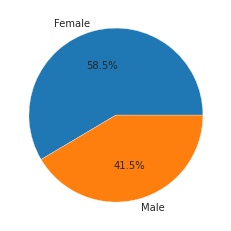

In [10]:
sex = mat_por["sex"].value_counts()
plt.pie(sex, labels=['Female', 'Male'], autopct='%1.1f%%')
plt.savefig('sex.png', bbox_inches='tight', pad_inches=0)

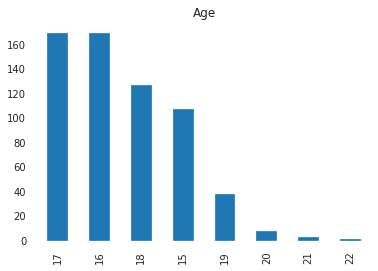

In [11]:
age = mat_por["age"].value_counts()
ax = age.plot.bar()
ax.set_title("Age")
plt.savefig('age.png')

Text(0.5, 1.0, 'Male daily alcohol consumption')

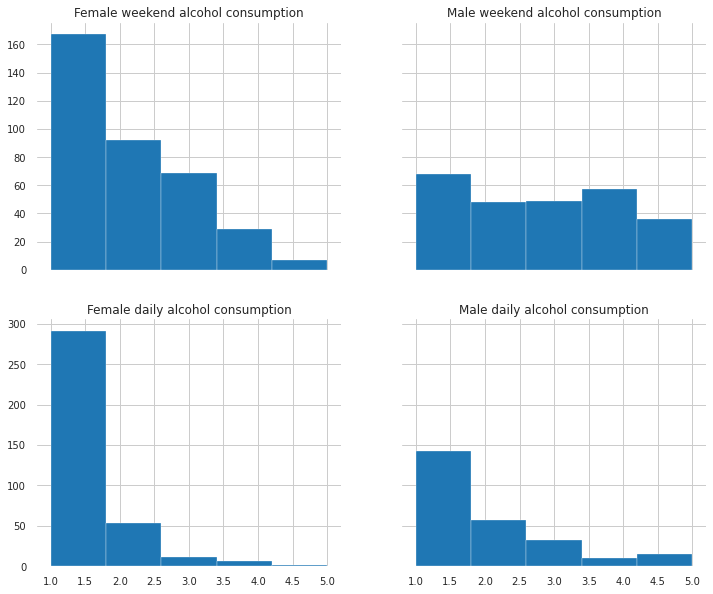

In [12]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(12, 10))
mat_por[mat_por['sex']=="F"]["Walc"].hist(bins=5, ax=ax[0][0])
mat_por[mat_por['sex']=="M"]["Walc"].hist(bins=5, ax=ax[0][1])
mat_por[mat_por['sex']=="F"]["Dalc"].hist(bins=5, ax=ax[1][0])
mat_por[mat_por['sex']=="M"]["Dalc"].hist(bins=5, ax=ax[1][1])
ax[0][0].set_title("Female weekend alcohol consumption")
ax[0][1].set_title("Male weekend alcohol consumption")
ax[1][0].set_title("Female daily alcohol consumption")
ax[1][1].set_title("Male daily alcohol consumption")

In [13]:
mat_por["Dalc"].describe()

count    622.000000
mean       1.509646
std        0.940622
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: Dalc, dtype: float64

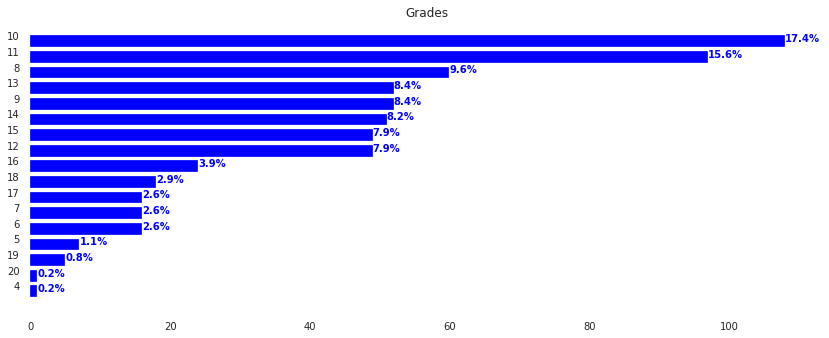

In [14]:
grades = mat_por["G3"].value_counts().sort_values()
fig = plt.figure(figsize=(11,4))
ax = fig.add_axes([0,0,1,1])
labels = grades.index
data = grades.values
width = 0.75
ind = np.arange(len(data))
ax.barh(ind, data, width, color="blue")

ax.set_yticks(ind+width/2)
ax.set_yticklabels(labels, minor=False)
ax.set_title("Grades")
for i, v in enumerate(data):
    ax.text(v, i + .003, "{:.1%}".format(v/sum(data)), color='blue', fontweight='bold')
plt.savefig("grades.png")

In [50]:
fig = plt.figure(figsize=(8,6), dpi=1600)
#2 rows 2 cols
#first row, first col
study_time = mat_por["studytime"].value_counts()
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(x=study_time.values, labels=study_time.index)
plt.title('Study time (hours)')
#first row sec col
higher = mat_por["higher"].value_counts()
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(x=higher.values, labels=['Yes', 'No'])
plt.title('Planning to pursue a higher education')
#Second row first column
medu = mat_por["Medu"].value_counts()
ax1 = plt.subplot2grid((2,2), (1, 0))
plt.pie(x=medu.sort_values().values, labels=['none', 'primary education', 
                                             '5th to 9th grade', 'secondary education', 'higher education'])
plt.title('Mother education')
#second row second column
fedu = mat_por["Fedu"].value_counts()
ax1 = plt.subplot2grid((2,2), (1, 1))
plt.pie(x=fedu.sort_values().values)
plt.title('Father education')

Text(0.5, 1.0, 'Father education')

In [16]:
fig = plt.figure(figsize=(8,6), dpi=1600)
#2 rows 2 cols
#first row, first col
study_time = mat_por["studytime"].value_counts()
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(x=study_time.values, labels=study_time.index)
plt.title('Study time (hours)')
#first row sec col
freetime = mat_por["freetime"].value_counts()
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(x=freetime.values, labels=freetime.index)
plt.title('Freetime')
#Second row first column
goout = mat_por["goout"].value_counts()
ax1 = plt.subplot2grid((2,2), (1, 0))
plt.pie(x=goout.values, labels=goout.index)
plt.title('Going out')
#second row second column
activities = mat_por["activities"].value_counts()
ax1 = plt.subplot2grid((2,2), (1, 1))
plt.pie(x=activities.sort_values().values, labels=["No", "Yes"])
plt.title('Extra-curricular activities')

Text(0.5, 1.0, 'Extra-curricular activities')

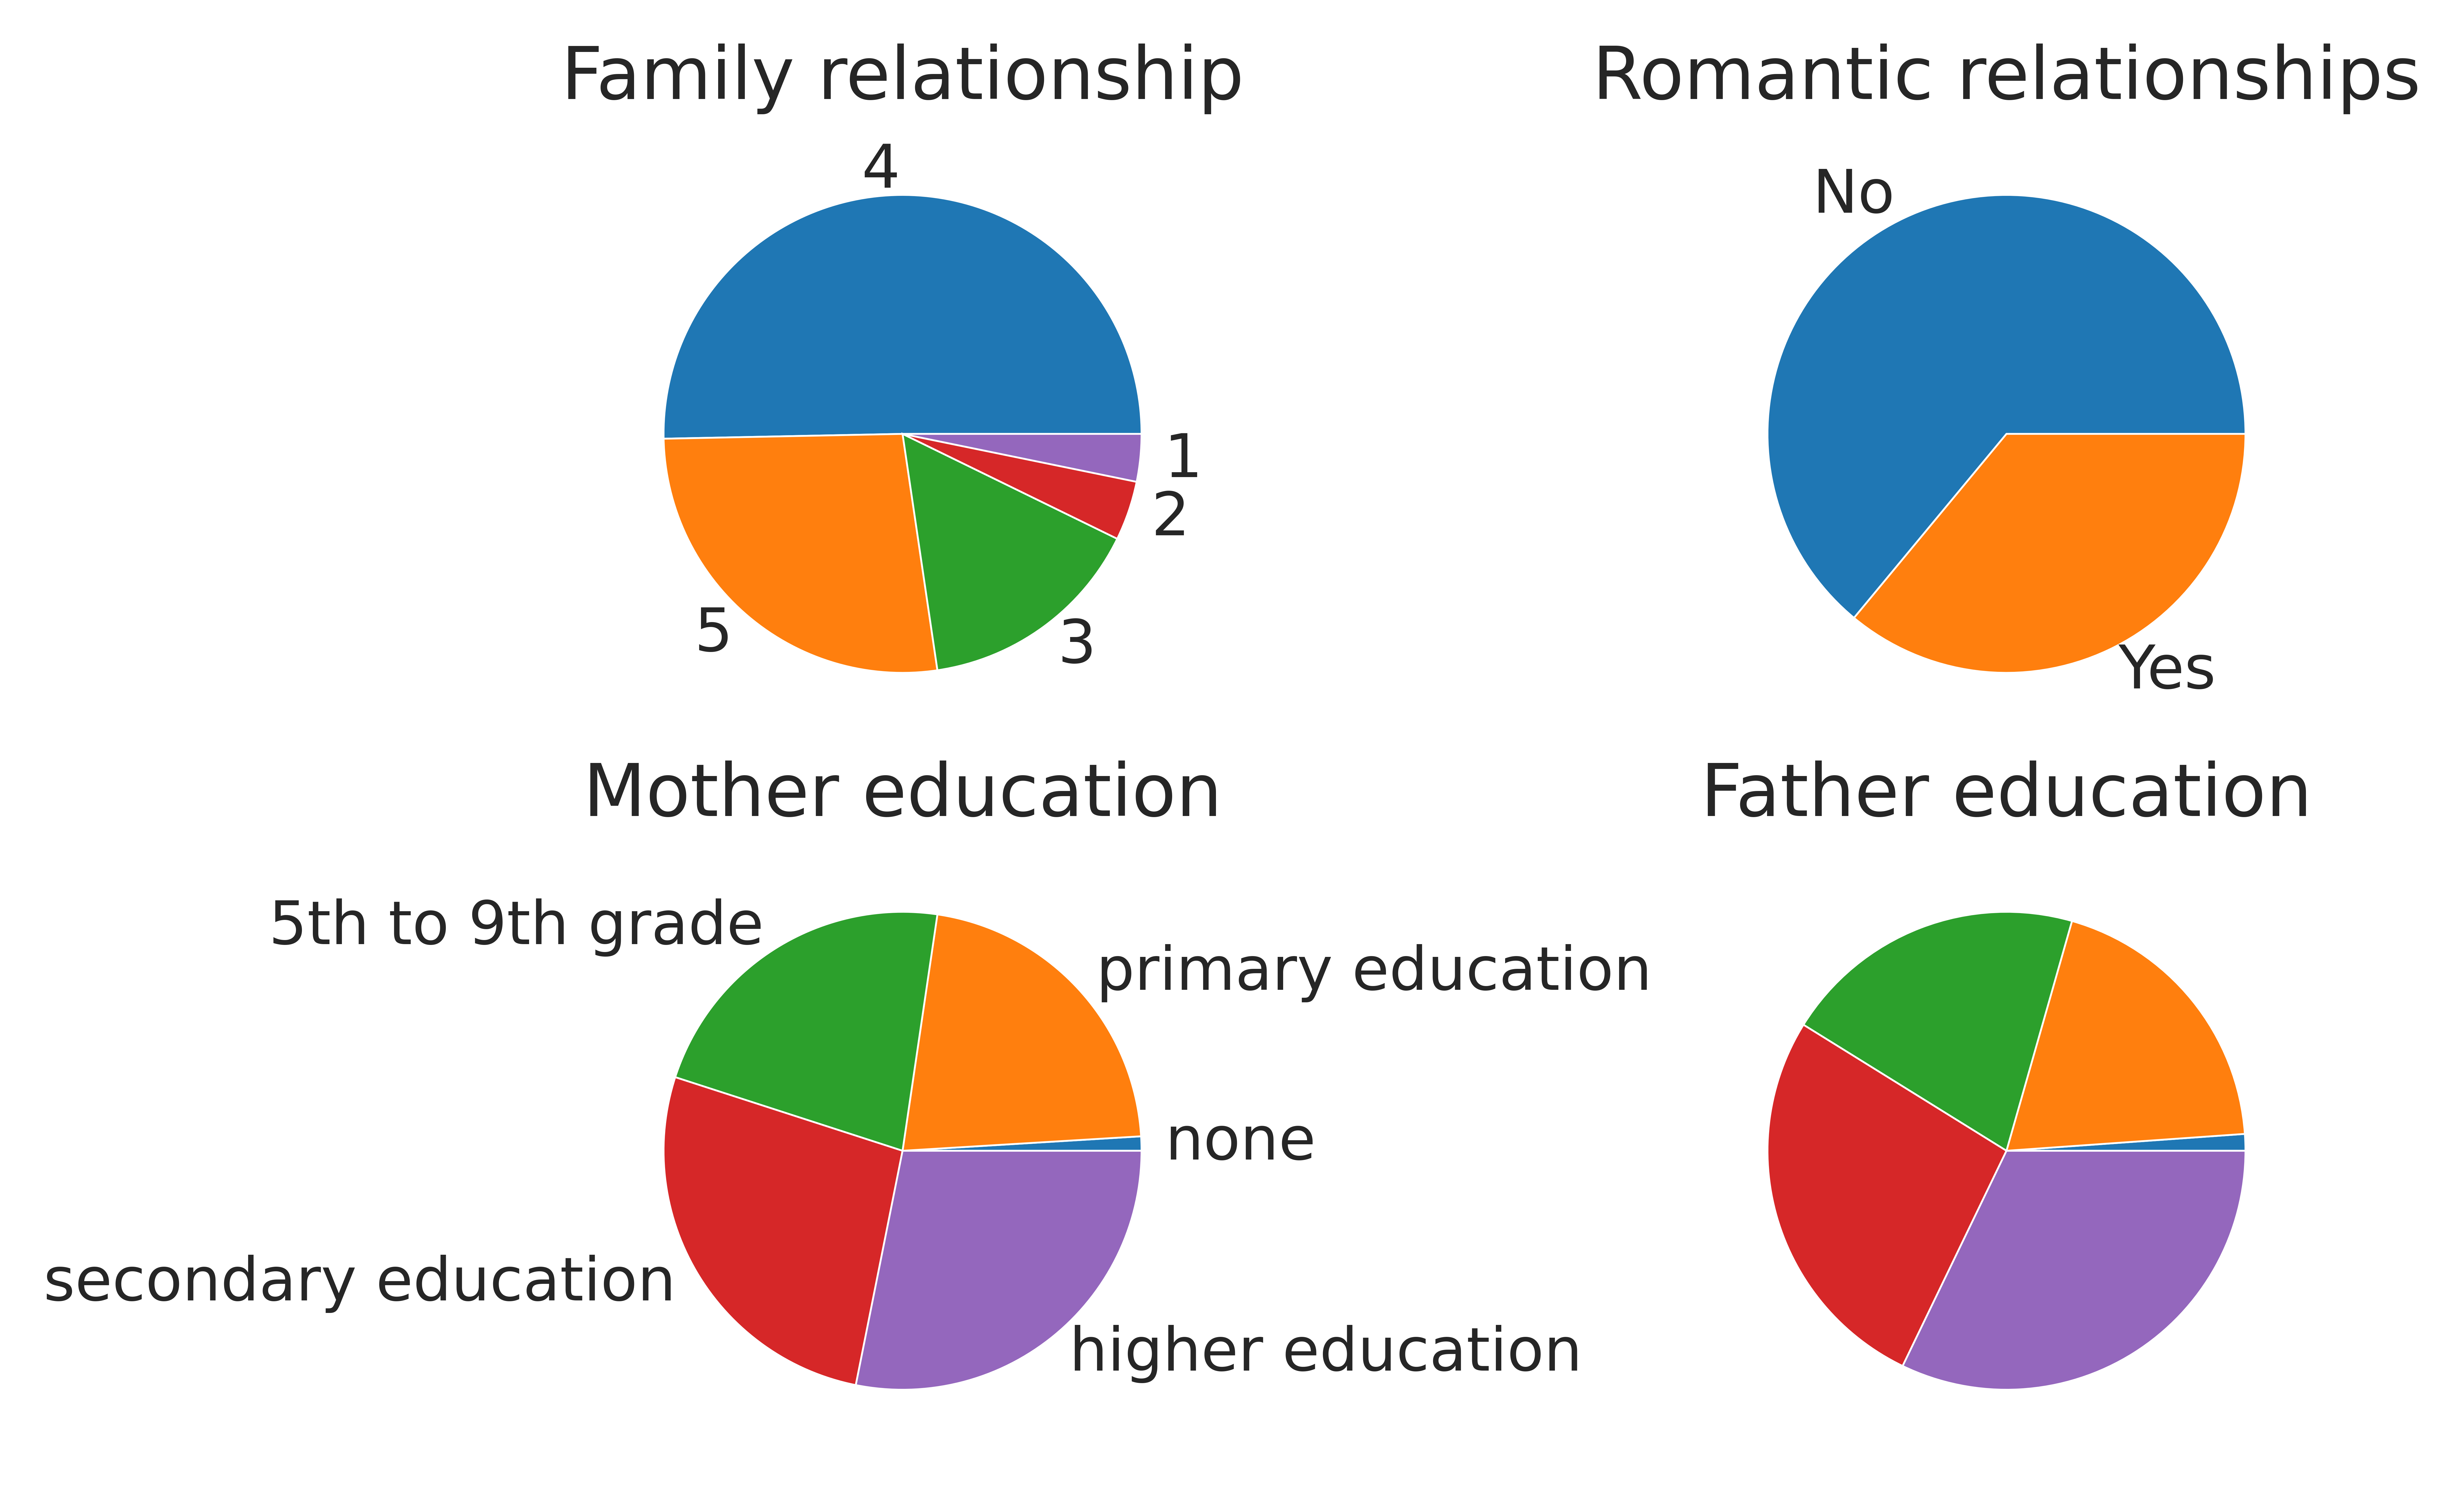

In [17]:
fig = plt.figure(figsize=(6,4), dpi=1600)
#2 rows 2 cols
#first row, first col
famrel = mat_por["famrel"].value_counts()
ax1 = plt.subplot2grid((2,2), (0, 0))
plt.pie(x=famrel.values, labels=famrel.index)
plt.title('Family relationship')
#first row sec col

romantic = mat_por["romantic"].value_counts()
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(x=romantic.values, labels=['No', 'Yes'])
plt.title('Romantic relationships')

# goout = mat_por["goout"].value_counts()
# ax1 = plt.subplot2grid((2,2), (0, 1))
# plt.pie(x=goout.values, labels=goout.index)
# plt.title('Going out')

#Second row first column
# failures = mat_por["failures"].value_counts()
# ax1 = plt.subplot2grid((2,2),(1,0))
# plt.pie(x=failures.values, labels=failures.index)
# plt.title('Failures')

medu = mat_por["Medu"].value_counts()
ax1 = plt.subplot2grid((2,2), (1, 0))
plt.pie(x=medu.sort_values().values, labels=['none', 'primary education', 
                                             '5th to 9th grade', 'secondary education', 'higher education'])
plt.title('Mother education')

#second row second column
fedu = mat_por["Fedu"].value_counts()
ax1 = plt.subplot2grid((2,2), (1, 1))
plt.pie(x=fedu.sort_values().values)
plt.title('Father education')
plt.savefig("social.png")

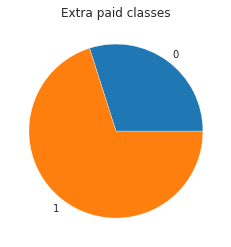

In [18]:
paid = mat_por["paid"].value_counts()
plt.pie(x=paid.sort_values().values, labels=paid.index)
plt.title('Extra paid classes')
plt.savefig("paid.png", bbox_inches='tight', pad_inches=0.2)

Text(0.5, 1.0, 'Number of absences')

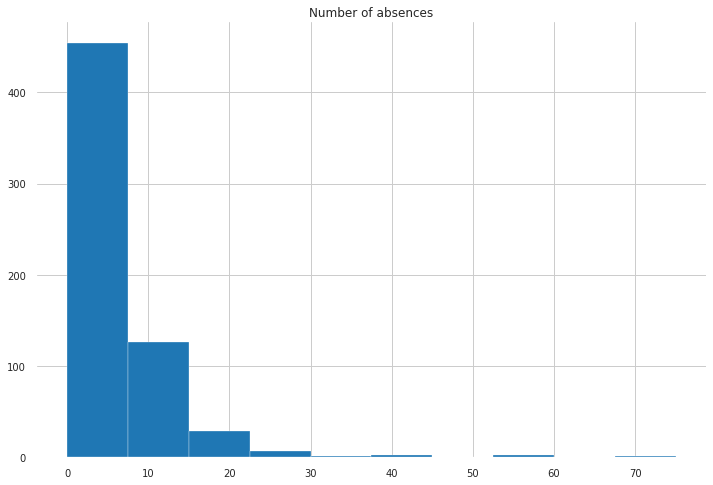

In [19]:
ax = mat_por['absences'].hist(figsize=(12,8))
ax.set_title("Number of absences")

# <div align="center">Exploratory Data Analysis</div>

### What numerical values have the strongest relationship with grades?

**<ul> Strong positive correlation</ul>**
    <li>Planning to pursue a higher education</li>
    <li>Study time</li>
    <li>Mother and father education</li>
    <li>Internet access</li>
**</ul>**
**<ul> Strong negative correlation</ul>**
    <li>Previous failures</li>
    <li>Workday alcohol consumption</li>
    <li>Weekend alcohol consumption</li>
    <li>Travel time</li>
    <li>Free time</li>
    <li>Age</li>
**</ul>**
**<ul> Medium  negative correlation</ul>**
    <li>Health condition</li>
    <li>Absenses</li>
    <li>Romantic relationship</li>
**</ul>**

###  What numerical values have the strongest relationship with number of alcohol consumption?

**<ul> Strong positive correlation</ul>**
    <li>Going out</li>
    <li>Absences</li>
    <li>Freetime</li>
    <li>Health condition</li>
**</ul>**
**<ul> Strong negative correlation</ul>**
    <li>Study time</li>
    <li>Grades</li>
    <li>Extra educational support</li>
    <li>Family relationship</li>
**</ul>**

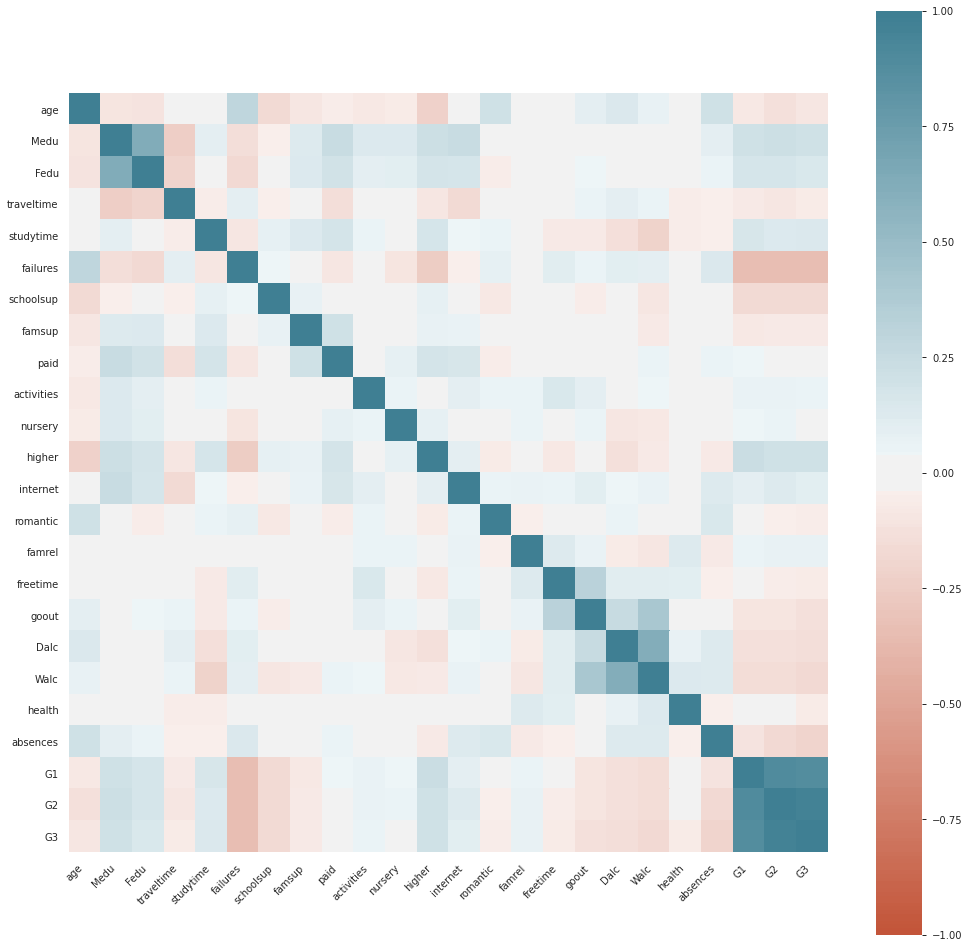

In [20]:
corr = mat_por.corr()
fig, ax = plt.subplots(figsize=(17,17)) 
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
plt.savefig('corr.png', bbox_inches='tight', pad_inches=0.2)

Text(0, 0.5, 'Mean alcohol consumption')

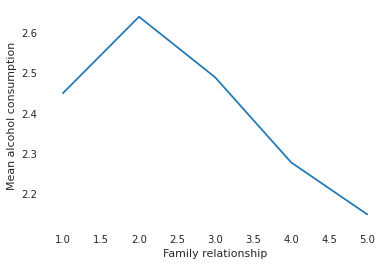

In [21]:
data = [mat_por[mat_por['famrel']==i]['Walc'].mean() for i in [1,2,3,4,5]]
plt.plot([1,2,3,4,5], data)
plt.xlabel('Family relationship')
plt.ylabel('Mean alcohol consumption')

Text(0, 0.5, 'Mean alcohol consumption')

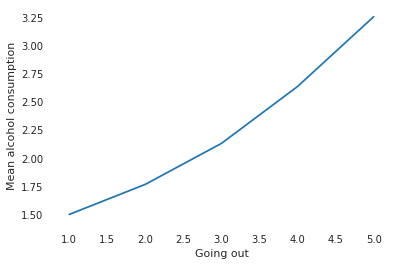

In [22]:
data = [mat_por[mat_por['goout']==i]['Walc'].mean() for i in [1,2,3,4,5]]
plt.plot([1,2,3,4,5], data)
plt.xlabel('Going out')
plt.ylabel('Mean alcohol consumption')

Text(0, 0.5, 'Mean alcohol consumption')

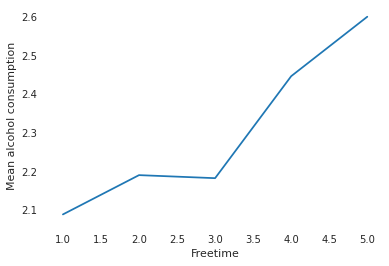

In [23]:
data = [mat_por[mat_por['freetime']==i]['Walc'].mean() for i in [1,2,3,4,5]]
plt.plot([1,2,3,4,5], data)
plt.xlabel('Freetime')
plt.ylabel('Mean alcohol consumption')

percentage: 0.2073732718894009


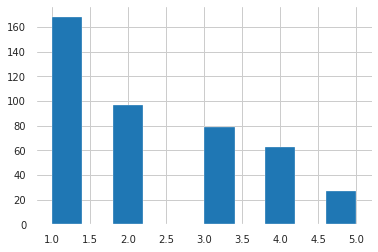

In [24]:
mat_por[mat_por['address']=='U']['Walc'].hist()
values = mat_por[mat_por['address']=='U']['Walc'].value_counts()
percentage = (values[5] + values[4])/sum(values)
print("percentage: {}".format(percentage))

percentage: 0.2074468085106383


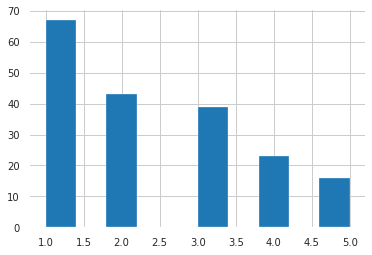

In [56]:
mat_por[mat_por['address']=='R']['Walc'].hist()
values_r = mat_por[mat_por['address']=='R']['Walc'].value_counts()
percentage_r = (values_r[5] + values_r[4])/sum(values_r)
print("percentage: {}".format(percentage_r))

percentage: 0.2148014440433213


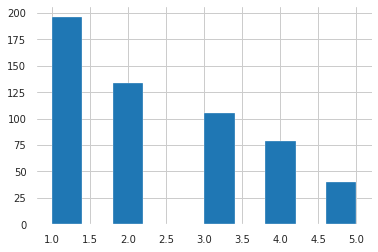

In [57]:
mat_por[mat_por['schoolsup']==0]['Walc'].hist()
schoolsup = mat_por[mat_por['schoolsup']==0]['Walc'].value_counts()
percentage_schoolsup = (schoolsup[5] + schoolsup[4])/sum(schoolsup)
print("percentage: {}".format(percentage_schoolsup))

percentage: 0.14705882352941177


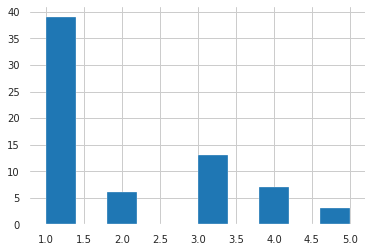

In [58]:
mat_por[mat_por['schoolsup']==1]['Walc'].hist()
schoolsup = mat_por[mat_por['schoolsup']==1]['Walc'].value_counts()
percentage_schoolsup = (schoolsup[5] + schoolsup[4])/sum(schoolsup)
print("percentage: {}".format(percentage_schoolsup))

percentage: 0.26141078838174275


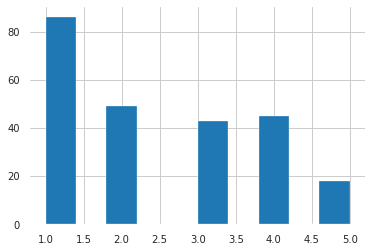

In [61]:
mat_por[mat_por['famsup']==0]['Walc'].hist()
famsup = mat_por[mat_por['famsup']==0]['Walc'].value_counts()
percentage_famsup = (famsup[5] + famsup[4])/sum(famsup)
print("percentage: {}".format(percentage_famsup))

percentage: 0.1732283464566929


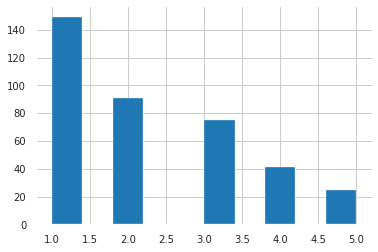

In [62]:
mat_por[mat_por['famsup']==1]['Walc'].hist()
famsup = mat_por[mat_por['famsup']==1]['Walc'].value_counts()
percentage_famsup = (famsup[5] + famsup[4])/sum(famsup)
print("percentage: {}".format(percentage_famsup))

In [ ]:
mat_por[mat_por['higher']==1]['Walc'].hist()
higher = mat_por[mat_por['higher']==1]['Walc'].value_counts()
percentage_higher = (higher[5] + higher[4])/sum(higher)
print("percentage: {}".format(percentage_higher))

In [29]:
stat, p = shapiro(mat_por["G3"])
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


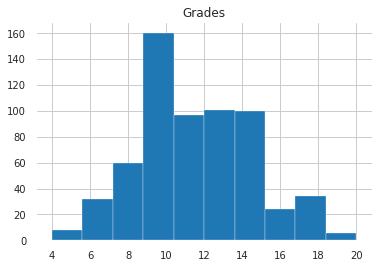

In [30]:
mat_por.hist(column="G3")
plt.title("Grades")
plt.savefig("dist.png")

In [31]:
chi_square_statistics = []
# 11 equi-distant bins of observed Data 
percentile_bins = np.linspace(0,100,11)
percentile_cutoffs = np.percentile(mat_por["G3"], percentile_bins)
observed_frequency, bins = (np.histogram(mat_por["G3"], bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)
dist_names = ['weibull_min','norm','weibull_max','beta',
              'invgauss','uniform','gamma','expon',   
              'lognorm','pearson3','triang']
# Loop through candidate distributions
for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(mat_por["G3"])
    print("{}\n{}\n".format(dist, param))


    # Get expected counts in percentile bins
    # cdf of fitted sistrinution across bins
    cdf_fitted = dist.cdf(percentile_cutoffs, *param)
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

    # Chi-square Statistics
    expected_frequency = np.array(expected_frequency) * len(mat_por["G3"])
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square_statistics.append(ss)


#Sort by minimum ch-square statistics
results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square_statistics
results.sort_values(['chi_square'], inplace=True)


print ('\nDistributions listed by Betterment of fit:')
print ('............................................')
print (results)

(2.830656303742268, 3.6042066852083385, 8.857792428539124)

(11.495176848874598, 3.0057515954602665)

(0.41604735430867235, 20.000000000000004, 1.3483185277060334)

(5.186620859153734, 8.875181931209028, 2.6052303813382798, 24.109714173470167)

(0.028257454278662636, -6.489865991649189, 635.5929144919855)

(4.0, 16.0)

(23.200047278972274, -3.020499748458382, 0.625674463031018)

(4.0, 7.495176848874598)

(0.13769047778195861, -10.292641663252878, 21.582487697500675)

(0.4151835289021275, 11.495211653104459, 3.0136761615948675)

(0.37430400528158825, 3.946834119112474, 16.171790350562183)


Distributions listed by Betterment of fit:
............................................
   Distribution   chi_square
1          norm    53.172215
8       lognorm    75.388598
9      pearson3    77.836541
6         gamma    77.844051
4      invgauss    87.918594
3          beta    89.282097
0   weibull_min    94.360787
10       triang   239.269991
5       uniform   549.161288
2   weibull_max  1839.968

In [32]:
X = mat.select_dtypes(include=[np.number]).iloc[:, 0:-3]
y = mat.iloc[:,-1]    
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))  

         Specs       Score
12    absences  648.166848
5     failures  140.934898
10        Walc   28.444167
9         Dalc   17.082868
1         Medu   13.894852
8        goout   10.472494
2         Fedu   10.375563
11      health   10.176668
3   traveltime    6.758151
4    studytime    6.231603


In [33]:
X_pol_reg = mat_por.loc[:, ["Walc", "failures", "higher", "studytime", "Medu", "goout", "absences"]]
y_pol_reg = mat_por.loc[:, "G3"]
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(X_pol_reg, y_pol_reg, test_size=0.33, random_state=42)

In [34]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train_pol)
x_poly_test = polynomial_features.fit_transform(X_test_pol)

model = LinearRegression()
model.fit(x_poly, y_train_pol)
y_poly_pred = model.predict(x_poly_test)

In [35]:
rmse = np.sqrt(mean_squared_error(y_test_pol,y_poly_pred))
print(rmse)
for test, pred in zip(y_test_pol,y_poly_pred):
    print(test, pred)

2.7947633670941388
10 12.046519732970218
12 9.994398887131318
8 12.502160793822215
18 12.912214570989779
19 13.019387224187604
10 12.168107949176498
8 8.7890286213077
15 10.540072924150738
9 12.093046550108447
10 10.265693019981924
5 11.395094833104853
15 11.526848887571152
11 12.96056942412455
7 11.334790948825901
10 7.722897255888643
12 11.156550745882445
7 9.576047667672155
10 11.362946119213566
11 11.41813571498113
15 11.532804946847486
14 12.499894859701115
13 13.541250572388186
14 12.081799424089247
10 8.3266563996417
11 12.051705123341593
14 13.898823148244551
12 10.867870312183438
11 11.860249399662901
8 13.607316021560322
10 12.917081521057247
9 10.701340041391
10 10.843170672275093
16 12.40022454980664
10 9.967593438513756
6 12.025251299556725
10 11.209102350176558
9 12.608477928341294
10 12.710929489996115
8 7.945691950473729
13 11.173695277664391
15 13.448057680313836
11 11.965650313012397
11 11.802220250181174
14 13.201499692392002
11 12.315218955028406
10 12.2018750031015

In [36]:
all_students = mat_por.copy()
all_students.loc[all_students["Walc"] <3, "Walc"] = 0
all_students.loc[all_students["Walc"] >= 3, "Walc"]=1
ones = all_students[all_students["Walc"]==1]

In [37]:
zeros = all_students[all_students["Walc"]==0].iloc[0:375,:]
zeros = zeros.append(ones)

In [38]:
X = zeros.loc[:, ["schoolsup", "famrel", "G3", "studytime", "freetime", "goout", "absences"]]
y = zeros.loc[:, "Walc"]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/olha/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [41]:
for t, p in zip(y_test,y_pred):
    print(t, p)

0 1
1 1
0 0
0 0
0 0
0 1
0 0
0 0
1 0
0 0
0 1
1 1
0 1
0 0
0 0
1 1
1 0
0 0
0 0
0 1
1 1
0 1
0 1
0 0
1 0
0 1
1 1
0 0
0 0
0 0
1 0
1 1
1 1
0 0
0 0
0 1
1 1
0 0
0 0
0 1
0 0
1 1
1 0
1 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
1 1
1 1
0 0
1 1
0 1
1 0
0 0
0 0
1 1
1 1
1 0
1 1
0 0
1 1
0 0
1 1
1 1
0 0
1 0
1 0
0 0
0 0
1 1
0 0
0 1
0 0
0 0
0 0
1 0
0 0
0 1
1 0
0 0
1 1
0 0
0 0
0 0
0 0
1 0
0 1
1 0
0 0
0 0
1 0
0 0
0 0
1 1
0 0
0 0
1 0
1 1
0 0
0 1
0 0
0 0
1 1
0 0
0 1
1 0
0 0
0 0
0 0
0 0
0 1
0 1
1 0
0 1
0 0
0 1
0 0
0 1
0 0
0 0
0 1
0 1
1 0
1 1
1 1
1 0
0 1
1 1
1 1
0 0
0 0
0 0
1 0
0 0
0 0
1 0
0 1
0 0
1 1
0 0
0 0
0 1
0 0
0 0
1 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 1
1 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
0 1
1 1
0 1
0 0
1 1
1 0
1 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
1 1
0 0
